In [1]:
import os

path = os.listdir('brain_tumor/Training/')
classes = {'no_tumor':0, 'pituitary_tumor':1}

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.layers import Input

In [17]:
import cv2
X = []
Y = []
for cls in classes:
    pth = 'brain_tumor/Training/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (256,256))
        X.append(img)
        Y.append(classes[cls])

In [18]:
X = np.array(X)
Y = np.array(Y)

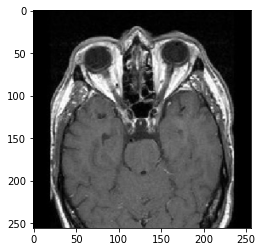

In [19]:
plt.imshow(X[0], cmap='gray')

In [20]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, random_state=10,
                                               test_size=.20)

In [21]:
xtrain.shape, xtest.shape

((977, 256, 256), (245, 256, 256))

In [22]:
#Model building starts
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Bidirectional,LSTM,Lambda, GRU
from tensorflow.keras.layers import Permute,GlobalMaxPool1D,Concatenate, Dense, BatchNormalization, Dropout, GlobalAveragePooling1D
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [23]:
input_ = Input(shape=(256,256,1))
lambda_ = Lambda(lambda x: tf.squeeze(x,axis=3))(input_)

lstm_ = Bidirectional(GRU(8,activation='relu',return_sequences=True))(lambda_)

permute_=Permute((2,1),input_shape=(128,128))(lambda_)
lstm_2 = Bidirectional(GRU(8,activation='relu',return_sequences=True))(permute_)

lstm_ = BatchNormalization()(lstm_)
maxpool1 = GlobalMaxPool1D()(lstm_)

lstm_2 = BatchNormalization()(lstm_2)
maxpool2 = GlobalMaxPool1D()(lstm_2)

concat_ = Concatenate(axis=1)([maxpool1,maxpool2])
dense_1 = Dense(20,activation='relu')(concat_)
output_ = Dense(2,activation='softmax')(dense_1)

model_gru = Model(input_,output_)

In [24]:
model_gru.compile(optimizer='Adam',
            loss='sparse_categorical_crossentropy',
             metrics=["accuracy"])

In [25]:
xx=xtrain
yy=ytrain

In [37]:
model_gru.fit(xtrain, ytrain, epochs=50, batch_size=20)

Epoch 1/50
49/49 [==============================] - 5s 101ms/step - loss: 0.1624 - accuracy: 0.9396
Epoch 2/50
49/49 [==============================] - 5s 107ms/step - loss: 0.1421 - accuracy: 0.9509
Epoch 3/50
49/49 [==============================] - 7s 151ms/step - loss: 0.2073 - accuracy: 0.9243
Epoch 4/50
49/49 [==============================] - 7s 144ms/step - loss: 0.1951 - accuracy: 0.9191
Epoch 5/50
49/49 [==============================] - 7s 138ms/step - loss: 0.1306 - accuracy: 0.9539
Epoch 6/50
49/49 [==============================] - 7s 137ms/step - loss: 0.1187 - accuracy: 0.9539
Epoch 7/50
49/49 [==============================] - 7s 141ms/step - loss: 0.1058 - accuracy: 0.9560
Epoch 8/50
49/49 [==============================] - 7s 142ms/step - loss: 0.0927 - accuracy: 0.9683
Epoch 9/50
49/49 [==============================] - 7s 138ms/step - loss: 0.0778 - accuracy: 0.9754
Epoch 10/50
49/49 [==============================] - 7s 143ms/step - loss: 0.0795 - accuracy: 0.9734

In [38]:
pred = model_gru.predict(xtest)

8/8 [==============================] - 0s 53ms/step


In [28]:
# misclassified=np.where(ytest!=pred)
# misclassified

In [29]:
# print("Total Misclassified Samples: ",len(misclassified[0]))
# print(pred[36],ytest[36])

In [39]:
dec = {0:'No Tumor', 1:'Positive Tumor'}

1/1 [==============================] - 0s 48ms/step


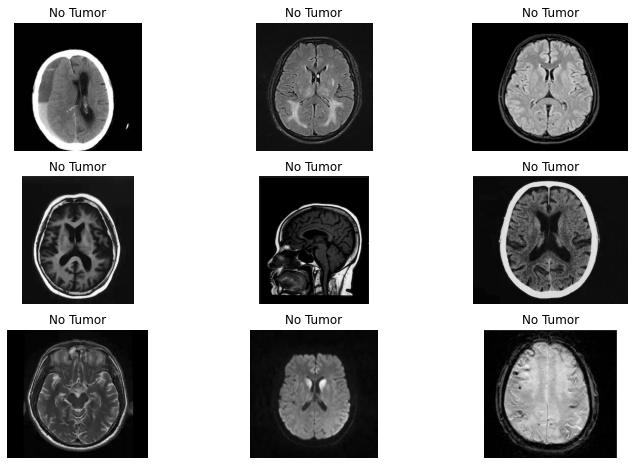

In [40]:
plt.figure(figsize=(12,8))
p = os.listdir('brain_tumor/Testing/')
c=1
for i in os.listdir('brain_tumor/Testing/no_tumor/')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread('brain_tumor/Testing/no_tumor/'+i,0)
    img1 = cv2.resize(img, (256,256))
    img1 = img1.reshape(1, 256, 256, 1)
    p = model_gru.predict(img1)
#     print(p)
    if p[0][0]>=.5:
        plt.title(dec[0])
    else:
        plt.title(dec[1])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

1/1 [==============================] - 0s 34ms/step
2.1940339e-07
1/1 [==============================] - 0s 41ms/step
0.7470695
1/1 [==============================] - 0s 34ms/step
3.1739153e-12
1/1 [==============================] - 0s 37ms/step
0.00070002367
1/1 [==============================] - 0s 36ms/step
0.004000628
1/1 [==============================] - 0s 33ms/step
0.9999999
1/1 [==============================] - 0s 45ms/step
0.094577946
1/1 [==============================] - 0s 47ms/step
2.1940339e-07
1/1 [==============================] - 0s 45ms/step
0.094577946
1/1 [==============================] - 0s 35ms/step
0.094577946
1/1 [==============================] - 0s 35ms/step
2.9270586e-05
1/1 [==============================] - 0s 35ms/step
2.9270586e-05
1/1 [==============================] - 0s 33ms/step
2.7845866e-05
1/1 [==============================] - 0s 34ms/step
2.7845866e-05
1/1 [==============================] - 0s 44ms/step
2.1940339e-07
1/1 [=====================

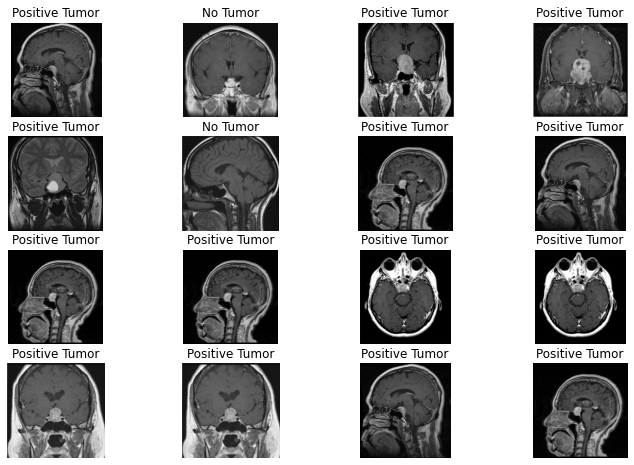

In [41]:
plt.figure(figsize=(12,8))
p = os.listdir('brain_tumor/Testing/')
c=1
for i in os.listdir('brain_tumor/Testing/pituitary_tumor/')[:16]:
    plt.subplot(4,4,c)
    
    img = cv2.imread('brain_tumor/Testing/pituitary_tumor/'+i,0)
    img1 = cv2.resize(img, (256,256))
    img1 = img1.reshape(1, 256, 256, 1)
    p = model_gru.predict(img1)
#     print(p)
    print(p[0][0])
    if p[0][0]>=.5:
        plt.title(dec[0])
    else:
        plt.title(dec[1])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

In [42]:
pred_y = np.argmax(pred, axis=1)

In [44]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score,precision_score, f1_score, recall_score,accuracy_score
print("Bidirectional-GRU Model Metrics")
print('Accuracy: ', accuracy_score(ytest, pred_y))
print('Precision: ', precision_score(ytest, pred_y))
print('F1 Score: ', f1_score(ytest, pred_y))
print('Recall Score: ', recall_score(ytest, pred_y))
print('Roc Auc Score: ', roc_auc_score(ytest, pred_y))

Bidirectional-GRU Model Metrics
Accuracy:  0.9836734693877551
Precision:  0.9878048780487805
F1 Score:  0.9878048780487805
Recall Score:  0.9878048780487805
Roc Auc Score:  0.9815567600120446
